# PyThorch - Trilha 6: Tarefa (Peso 3)
###### Gabriel Elias Lima Silva

## Fraudes de Cartão de Crédito
- Endereço do executavel: https://github.com/VanJessen/Deep-Learning-Mackenzie
- Endereço do arquivo para download: https://www.kaggle.com/elvisacaciobarbosa/detec-o-de-fraude-no-cart-o-de-cr-dito/data

Esse trabalho tem como objetivo ajudar a entender as características de uma transação fraudulenta de cartão de crédito. Bem como prever através das características dessa transação, se essa é ou não uma fraude. O tema é 100% relevante pois trabalho no Santander e essa é uma oportunidade que eu tenho de entender academicamente como eu posso agregar valor na atividade que possuo hoje no Banco.



#### Importações e Configurações Iniciais

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
import tqdm

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable

#### Importando a base

In [4]:
df = pd.read_csv('creditcard.csv')

#### Realizando Análise Exploratório - EDA | Aplicando tratamentos ao dataset

In [5]:
#pp.ProfileReport(df)

In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# conhecendo a base
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#verificando estatistica da base
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
# verificando se existe valores nulos na base

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# verificando se existe duplicidades na base
df.duplicated().sum()

1081

In [12]:
# foi identificado duplicidades e ser tratadas
df.drop_duplicates(inplace=True)

In [13]:
# confirmando se ainda existe duplicidades na base
df.duplicated().sum()

0

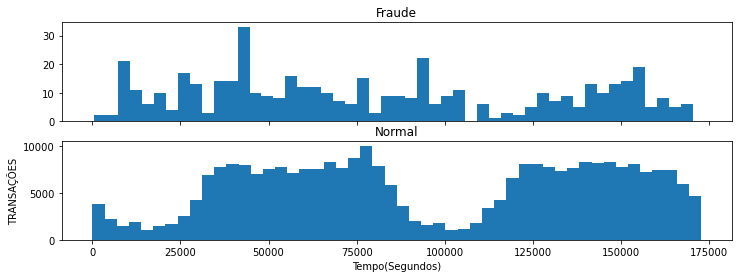

In [14]:
# Avaliando Distribução das classes
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Tempo(Segundos)')
plt.ylabel('TRANSAÇÕES')
plt.show()

#### Preparando os dados

In [15]:
# dividindo o target das demais features
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

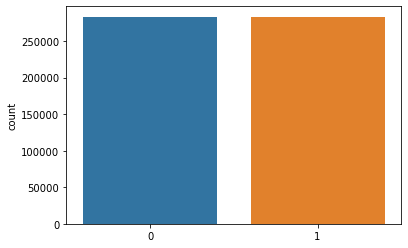

In [35]:
sns.countplot(y)
plt.show()

Observa-se que o target está altamente desbalanceado. Há a necessidade de balanceamento para que o modelo não entenda que tudo não é Fraude e obter alta acurácia dessa maneira;

In [17]:
#balanceando dataset através do metodo RandomOverSampler. 
#O metodo em questão adicona registros semelhantes a classe com menor categoria no dataset
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X,y = oversample.fit_resample(X, y)

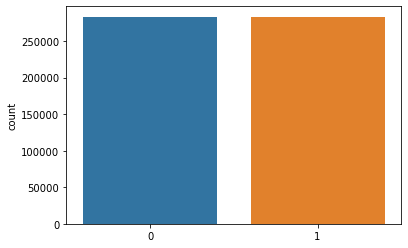

In [34]:
sns.countplot(y)
plt.show()

In [33]:
# normalizando os dados

from sklearn.preprocessing import scale
X = scale(X)


In [20]:
# dividindo a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [21]:
# treinamento do modelo

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))       
        return x

model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters())
loss_fn   = nn.BCELoss()


X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).float()

X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

EPOCHS  = 100

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train.reshape(-1,1))
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        #correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        correct = (y_pred[:,0]> 0.5) == y_test
        #accuracy_list[epoch] = correct.mean()
        accuracy_list[epoch] = correct.sum() / len(correct)
        
        


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:12<00:00,  1.38it/s]


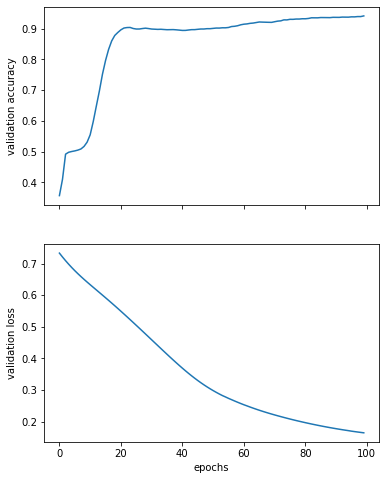

In [22]:
def plot_history(loss_list,  accuracy_list):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 8), sharex=True)

  ax1.plot(accuracy_list)
  ax1.set_ylabel("validation accuracy")
  ax2.plot(loss_list)
  ax2.set_ylabel("validation loss")
  ax2.set_xlabel("epochs")
  plt.show()

  return

plot_history(loss_list,  accuracy_list) 

Observa-se que que a acurácia inicia em 65% e evolui até 94.15% em quanto o loss inicia-se em 70% e reduz 16.46% o que é uma margem de treino e evolução do modelo muito boa.

In [23]:
#Acurácia do Modelo
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.detach().numpy(), y_pred.detach().numpy() > 0.5 ))
print(loss)

0.9415011297307475
tensor(0.1646, grad_fn=<BinaryCrossEntropyBackward0>)


In [24]:
# Analisando distribuição dos erros e acertos do modelo

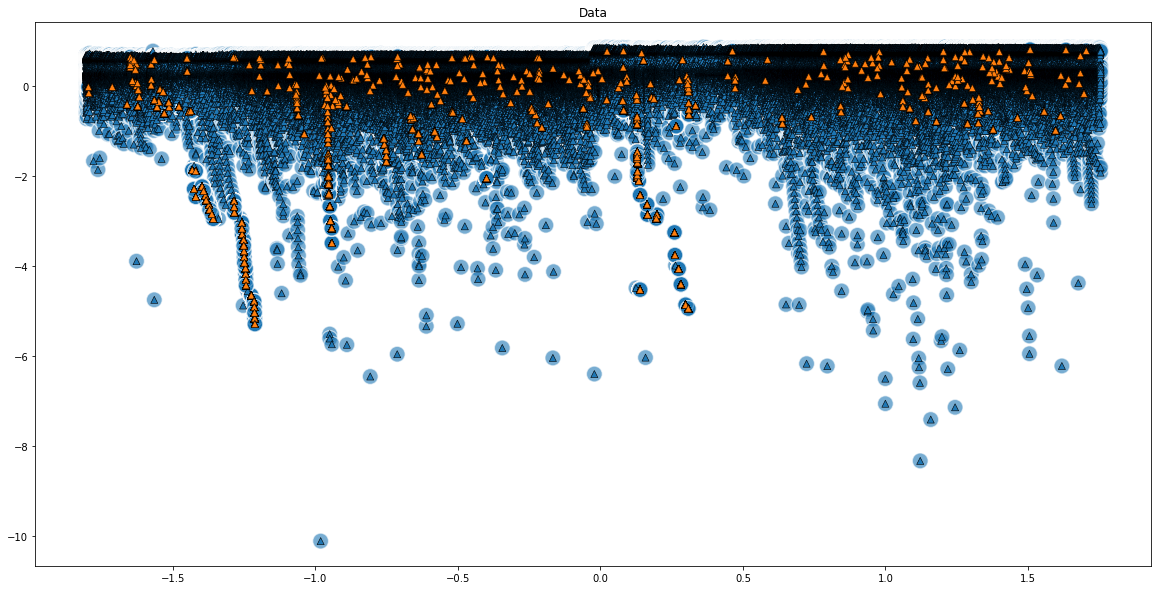

In [32]:
plt.figure(figsize=(20,10))

X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

#balanceando dataset
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X,y = oversample.fit_resample(X, y)

from sklearn.preprocessing import scale
X = scale(X)
X

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

X_ = Variable(torch.from_numpy(X)).float()
y_pred = model(X_)
y_pred = np.argmax(y_pred.detach().numpy(), axis=1)
sns.scatterplot(x=X_[:,0], y=X_[:,1], hue=y_pred, marker='o', s=250, legend=False, alpha=0.6)
sns.scatterplot(x=X_[:,0], y=X_[:,1], hue=y.reshape(1,-1)[0], marker='^', s=50, edgecolor='k', legend=False).set_title('Data')
plt.show()

Através do grafico de dispersão é possível localizar os casos que o modelo não foi capas de prever corretamente. Esses são aqueles que possuem o tringulo de cor diferente do circulo. A conclusão é que o modelo teve acurácia muito boa. Para isso, foi necessário aplicar a normalização e o balanceamento pois os resultados anterior a aplicação dessas técnicas não foram tão bom (50% de acurácia sem a normalização e quase 100% de acurácia sem o balanceamento, pois o modelo apontava todas as ocorrências como Não Fraude.